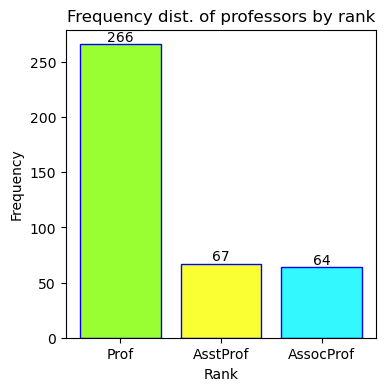

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\yugas\Downloads\Salaries.csv')

rank_freq = df['rank'].value_counts()

plt.figure(figsize=(4,4))
bars = plt.bar(rank_freq.index, rank_freq.values, color='#99FF33', edgecolor='blue')

colors = {'Prof': '#99FF33', 'AssocProf': '#33F9FF', 'AsstProf': '#F9FF33'}

for bar, rank in zip(bars, rank_freq.index):
    bar.set_color(colors[rank])
    bar.set_edgecolor('blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.title('Frequency dist. of professors by rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')

plt.show()


count    397.000000
mean      22.314861
std       12.887003
min        1.000000
25%       12.000000
50%       21.000000
75%       32.000000
max       56.000000
Name: phd, dtype: float64
0


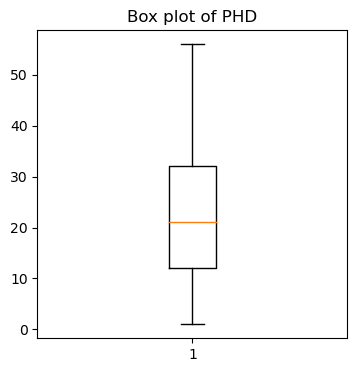

(0, 10]      87
(10, 20]    106
(20, 30]     93
(30, 40]     76
(40, 50]     30
(50, 60]      5
Name: phd_bins, dtype: int64


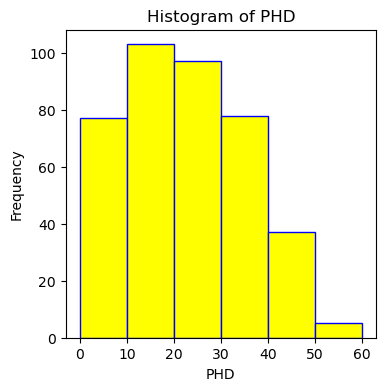

In [5]:
print(df['phd'].describe())

print(df['phd'].isnull().sum())


plt.figure(figsize=(4,4))
plt.boxplot(df['phd'].dropna())
plt.title('Box plot of PHD')
plt.show()


bins = np.arange(0, 70, 10)  
df['phd_bins'] = pd.cut(df['phd'], bins=bins)
print(df['phd_bins'].value_counts().sort_index())


plt.figure(figsize=(4,4))
plt.hist(df['phd'], bins=bins, color='yellow', edgecolor='blue')
plt.title('Histogram of PHD')
plt.xlabel('PHD')
plt.ylabel('Frequency')
plt.show()


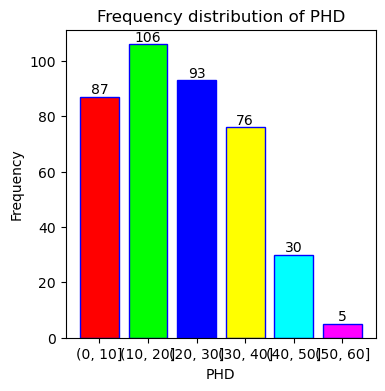

In [6]:
bins = np.arange(0, 70, 10)  
df['phd_bins'] = pd.cut(df['phd'], bins=bins)


phd_freq = df['phd_bins'].value_counts().sort_index()


plt.figure(figsize=(4,4))
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']  
bars = plt.bar(phd_freq.index.astype(str), phd_freq.values, color=colors, edgecolor='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.title('Frequency distribution of PHD')
plt.xlabel('PHD')
plt.ylabel('Frequency')

plt.show()

sex        Female  Male
rank                   
AssocProf      10    54
AsstProf       11    56
Prof           18   248


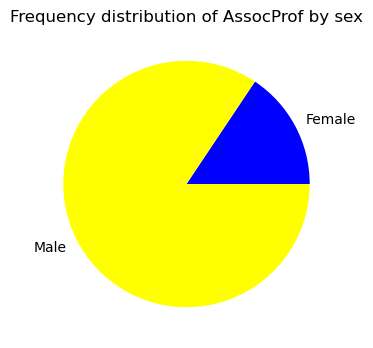

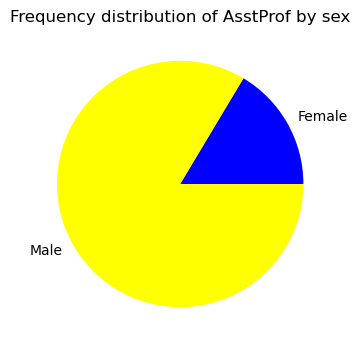

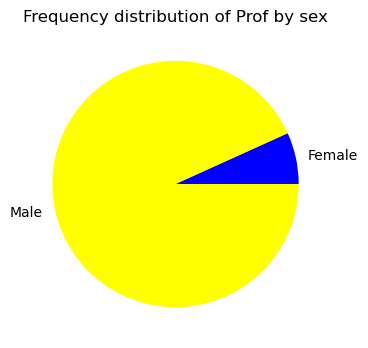

rank       sex   
AssocProf  Female     88512.80
           Male       94869.70
AsstProf   Female     78049.91
           Male       81311.46
Prof       Female    121967.61
           Male      127120.82
Name: salary, dtype: float64


In [8]:
import numpy as np


cross_tab = pd.crosstab(df['rank'], df['sex'])
print(cross_tab)

colors = {'Male': 'yellow', 'Female': 'blue'}
for rank in cross_tab.index:
    plt.figure(figsize=(4,4))
    plt.pie(cross_tab.loc[rank], labels=cross_tab.columns, colors=[colors[sex] for sex in cross_tab.columns])
    plt.title(f'Frequency distribution of {rank} by sex')
    plt.show()

mean_salary = df.groupby(['rank', 'sex'])['salary'].mean().round(2)
print(mean_salary)
plt.show()


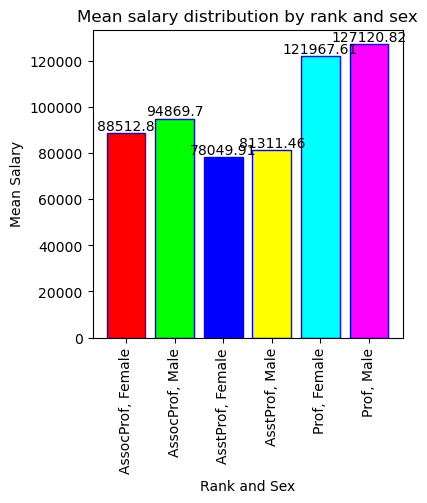

In [13]:
mean_salary = df.groupby(['rank', 'sex'])['salary'].mean()

mean_salary.index = mean_salary.index.map(lambda x: ', '.join(x))

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']  
plt.figure(figsize=(4,4))
bars = plt.bar(mean_salary.index, mean_salary.values, color=colors, edgecolor='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.title('Mean salary distribution by rank and sex')
plt.xlabel('Rank and Sex')
plt.ylabel('Mean Salary')

plt.show()


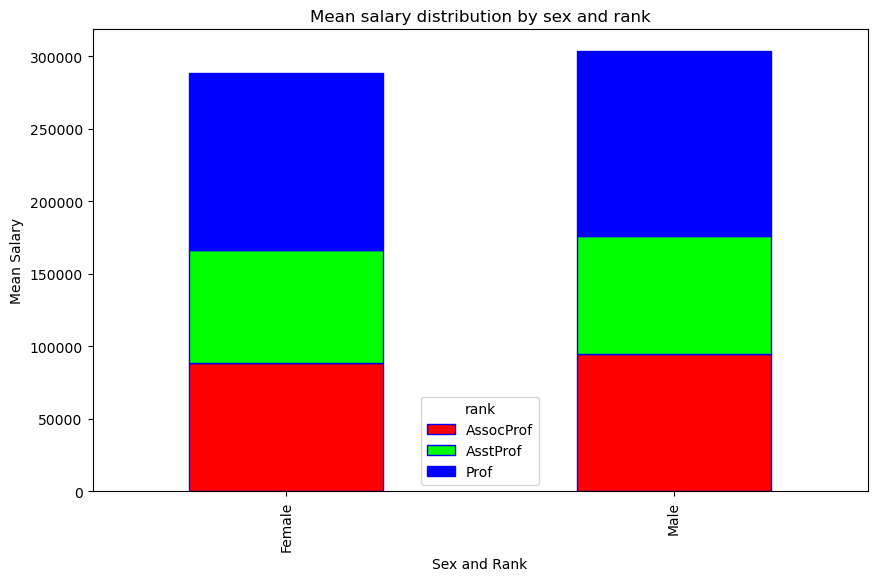

In [14]:
mean_salary = df.groupby(['sex', 'rank'])['salary'].mean().unstack()

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']  
mean_salary.plot(kind='bar', stacked=True, color=colors, edgecolor='blue', figsize=(10, 6))

plt.title('Mean salary distribution by sex and rank')
plt.xlabel('Sex and Rank')
plt.ylabel('Mean Salary')

plt.show()


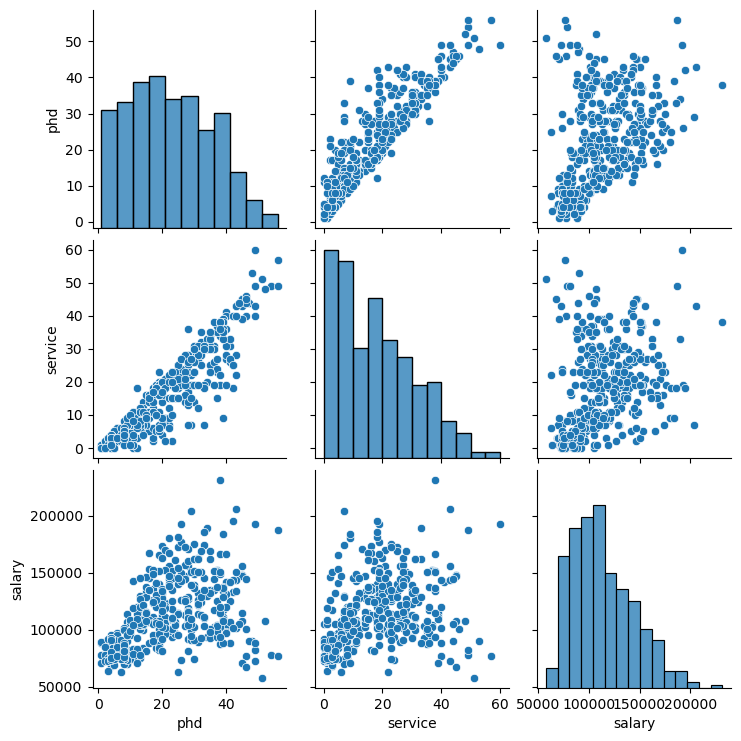

              phd   service    salary
phd      1.000000  0.909649  0.419231
service  0.909649  1.000000  0.334745
salary   0.419231  0.334745  1.000000


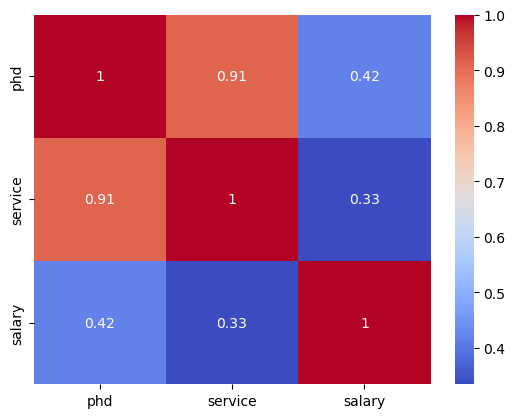

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'C:\Users\yugas\Downloads\Salaries.csv')

# 1) Create a new DataFrame with numeric columns only
numeric_df = df.select_dtypes(include=[np.number])
if 'index' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['index'])

# 2) Draw a correlogram of the numeric columns
sns.pairplot(numeric_df)
plt.show()

# 3) Calculate the correlation coefficient matrix of all numeric columns
corr_matrix = numeric_df.corr()
print(corr_matrix)

# 4) Draw the heatmap of correlation coefficient matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#5
#As for interpreting the results:

#The correlogram (pairplot) shows the relationship between each pair of numeric columns. If the points in a scatter plot lie along a straight line (either ascending or descending), it indicates a strong correlation between the two variables.
#The correlation coefficient matrix quantifies the degree of correlation between each pair of variables. A value close to 1 or -1 indicates a strong positive or negative correlation, respectively, while a value close to 0 indicates a weak correlation.
#The heatmap provides a visual representation of the correlation matrix, making it easier to spot highly correlated variables. Darker or lighter colors represent stronger correlations.